# Descrição

TBD

## Setup do Ambiente

In [ ]:
install.packages("rlang")
install.packages('pROC')
install.packages('openxlsx')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rlang)
library(pROC)
library(openxlsx)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
# # install.packages('epiR')
# # library(epiR)
# library(devtools)
# install_github('cran/epiR')

## Leitura dos dados

In [ ]:
# Leitura do dataset e carregamento no dataframe dados

dados <- read.csv(file.path("https://raw.githubusercontent.com/pedrogemal/stats/main/roc_data_20231030.csv"), dec = ',')
options(warn=-1)

In [ ]:
# Primeiras linhas do dataset

data(dados)
head(dados)

,adhere_score,gwtg_score,y_allvar,y_allvar_prob,y_b7,y_b7_prob,y_b3,y_b3_prob,y_gwtg,y_gwtg_prob,y_adhere,y_adhere_prob,hospital_death
,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,1,29,0,0.0003742688,0,0.002892708,0,0.011513119,0,0.038198940,0,0.005230816,0
2,1,38,0,0.0026091458,0,0.034161590,0,0.006175851,0,0.013734064,0,0.010109146,0
3,1,53,0,0.0051370440,0,0.044726260,0,0.480761650,0,0.198601590,0,0.026454272,0
4,1,37,0,0.0003367580,0,0.064411655,0,0.059750453,0,0.002090020,0,0.018926335,0
5,3,39,0,0.0022193950,0,0.031626023,0,0.001439565,0,0.008104341,0,0.077337090,0
6,2,48,0,0.0006290409,0,0.031063713,0,0.010376619,0,0.032494243,0,0.070989550,0


In [ ]:
str(dados)
attach(dados)

'data.frame':	1121 obs. of  13 variables:
 $ adhere_score  : int  1 1 1 1 3 2 4 2 2 3 ...
 $ gwtg_score    : int  29 38 53 37 39 48 46 43 46 38 ...
 $ y_allvar      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ y_allvar_prob : num  0.000374 0.002609 0.005137 0.000337 0.002219 ...
 $ y_b7          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ y_b7_prob     : num  0.00289 0.03416 0.04473 0.06441 0.03163 ...
 $ y_b3          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ y_b3_prob     : num  0.01151 0.00618 0.48076 0.05975 0.00144 ...
 $ y_gwtg        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ y_gwtg_prob   : num  0.0382 0.01373 0.1986 0.00209 0.0081 ...
 $ y_adhere      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ y_adhere_prob : num  0.00523 0.01011 0.02645 0.01893 0.07734 ...
 $ hospital_death: int  0 0 0 0 0 0 0 0 0 0 ...


## Resultados da área sob a Curva ROC

In [ ]:
# Construção das curvas baseada nas colunas do arquivo roc_data

roc1=roc(hospital_death~ adhere_score, data = dados,ci=T,percent=T)
roc2=roc(hospital_death~ gwtg_score, data = dados,ci=T,percent=T)
roc3=roc(hospital_death~ y_b7_prob, data = dados,ci=T,percent=T)
roc4=roc(hospital_death~ y_b3_prob, data = dados,ci=T,percent=T)
roc5=roc(hospital_death~ y_adhere_prob, data = dados,ci=T,percent=T)
roc6=roc(hospital_death~ y_gwtg_prob, data = dados,ci=T,percent=T)
roc7=roc(hospital_death~ y_allvar_prob, data = dados,ci=T,percent=T)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [ ]:
# Exportação da imagem em formato tif, com configurações de tamanho e resolução

#tiff(file=paste("cROC.tif",sep=""), width = 6, height = 6, units = 'in', res = 300, compression = 'lzw')

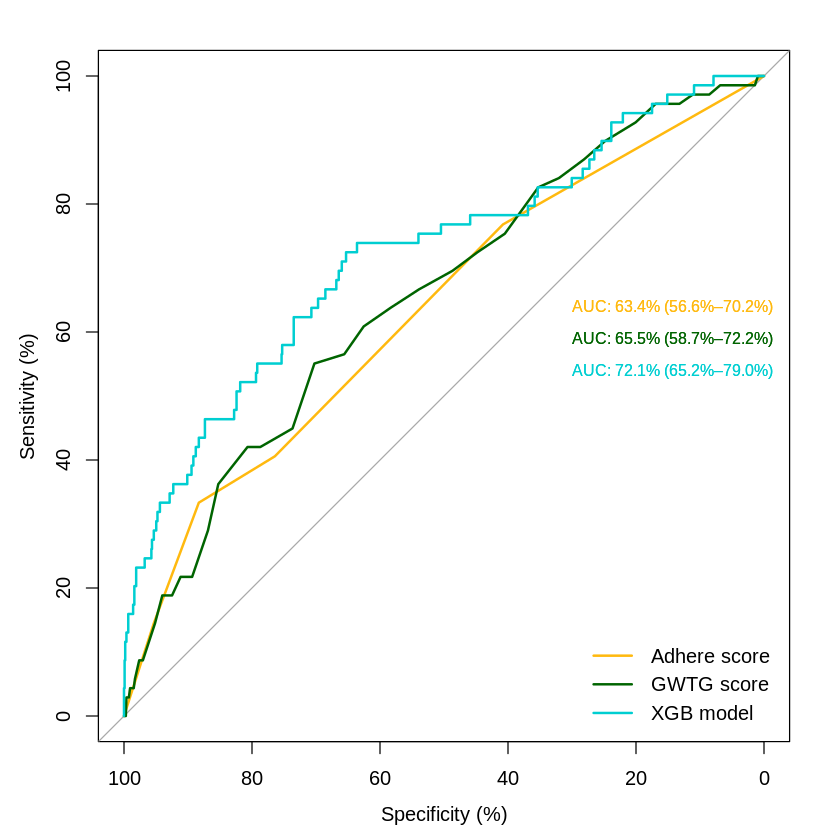

In [ ]:
# Plotagem do gráfico em que cada linha do código corresponde a uma curva do gráfico

proc1 <- plot(roc1, print.auc = T, col = "darkgoldenrod1",print.auc.y = 65, print.auc.x=30, print.auc.cex=0.8)
proc2 <- plot(roc2, print.auc = T, col = "darkgreen", print.auc.y = 60, print.auc.x=30, print.auc.cex=0.8, add = TRUE)
# proc3 <- plot(roc3, print.auc = T, col = "darkorchid",print.auc.y = 55, print.auc.x=30, print.auc.cex=0.8, add = TRUE)
# proc4 <- plot(roc4, print.auc = T, col = "black", print.auc.y = 50, print.auc.x=30, print.auc.cex=0.8, add = TRUE)
# proc5 <- plot(roc5, print.auc = T, col = "blue1", print.auc.y = 45, print.auc.x=30, print.auc.cex=0.8, add = TRUE)
# proc6 <- plot(roc6, print.auc = T, col = "firebrick", print.auc.y = 40, print.auc.x=30, print.auc.cex=0.8, add = TRUE)
proc7 <- plot(roc7, print.auc = T, col = "darkturquoise", print.auc.y = 55, print.auc.x=30, print.auc.cex=0.8, add = TRUE)
legend("bottomright", ncol=1,legend=c("Adhere score","GWTG score",
# "XGB model with best 7 variables",
# "XGB model with best 3 variables","XGB model with Adhere's variables",
# "XGB model with GWTG's variables",
"XGB model"),lty=1,
col=c("darkgoldenrod1","darkgreen",
# "darkorchid","black","blue1","firebrick",
"darkturquoise"),bty="n",lwd=2)

In [ ]:
# dev.off()

In [ ]:
result1=coords(roc1, "all",ret=c("threshold", "specificity", "sensitivity", "accuracy","npv", "ppv"))
result1=as.data.frame(result1)

result2=coords(roc2, "all",ret=c("threshold", "specificity", "sensitivity", "accuracy","npv", "ppv"))
result2=as.data.frame(result2)

result3=coords(roc3, "all",ret=c("threshold", "specificity", "sensitivity", "accuracy","npv", "ppv"))
result3=as.data.frame(result3)

result4=coords(roc4, "all",ret=c("threshold", "specificity", "sensitivity", "accuracy","npv", "ppv"))
result4=as.data.frame(result4)

result5=coords(roc5, "all",ret=c("threshold", "specificity", "sensitivity", "accuracy","npv", "ppv"))
result5=as.data.frame(result5)

result6=coords(roc6, "all",ret=c("threshold", "specificity", "sensitivity", "accuracy","npv", "ppv"))
result6=as.data.frame(result6)

result7=coords(roc7, "all",ret=c("threshold", "specificity", "sensitivity", "accuracy","npv", "ppv"))
result7=as.data.frame(result7)

In [ ]:
# Table outputs rates
# openxlsx::write.xlsx(list(adhere_score= result1,
# gwtg_score= result2,
# y_b7_prob= result3,
# y_b3_prob= result4,
# y_adhere_prob= result5,
# y_gwtg_prob= result6,
# y_allvar_prob= result7),row.names=T,overwrite=T, "AUC_RESULTS.xlsx")

In [ ]:
openxlsx::write.xlsx(list(adhere_score= result1,
gwtg_score= result2,
y_b7_prob= result3,
y_b3_prob= result4,
y_adhere_prob= result5,
y_gwtg_prob= result6,
y_allvar_prob= result7),row.names=T,overwrite=T, "AUC_RESULTS.xlsx")

## Tentativas para classificar os escores Adhere e GWTG em 2 categorias

In [ ]:
# #binary test: adhere

# dados$adhere1 = dados$adhere_score
# dados$adhere1[dados$adhere1==1] <- 1
# dados$adhere1[dados$adhere1==2] <- 0
# dados$adhere1[dados$adhere1==3] <- 0
# dados$adhere1[dados$adhere1==4] <- 0
# dados$adhere1[dados$adhere1==5] <- 0

# tab11=table(dados$adhere1,dados$hospital_death)
# dat11 <- c(tab11[2,2],tab11[2,1],tab11[1,2],tab11[1,1])
# test11<- epiR::epi.tests(dat11 , method = "exact", digits = 2, conf.level = 0.95)
# print(test11)
# clipr::write_clip(test11$tab)

In [ ]:
# dados$adhere2 = dados$adhere_score
# dados$adhere2 [dados$adhere2 ==1] <- 1
# dados$adhere2 [dados$adhere2 ==2] <- 1
# dados$adhere2 [dados$adhere2 ==3] <- 0
# dados$adhere2 [dados$adhere2 ==4] <- 0
# dados$adhere2 [dados$adhere2 ==5] <- 0

# tab12=table(dados$adhere2,dados$hospital_death)
# dat12 <- c(tab12[2,2],tab12[2,1],tab12[1,2],tab12[1,1])
# test12<- epiR::epi.tests(dat12 , method = "exact", digits = 2, conf.level = 0.95)
# print(test12)
# clipr::write_clip(test12$tab)

In [ ]:
# dados$adhere3 = dados$adhere_score
# dados$adhere3 [dados$adhere3 ==1] <- 1
# dados$adhere3 [dados$adhere3 ==2] <- 1
# dados$adhere3 [dados$adhere3 ==3] <- 1
# dados$adhere3 [dados$adhere3 ==4] <- 0
# dados$adhere3 [dados$adhere3 ==5] <- 0

# tab13=table(dados$adhere3 ,dados$hospital_death)
# dat13 <- c(tab13[2,2],tab13[2,1],tab13[1,2],tab13[1,1])
# test13<- epiR::epi.tests(dat13 , method = "exact", digits = 2, conf.level = 0.95)
# print(test13)
# clipr::write_clip(test13$tab)

In [ ]:
# dados$adhere4 = dados$adhere_score
# dados$adhere4 [dados$adhere4 ==1] <- 1
# dados$adhere4 [dados$adhere4 ==2] <- 1
# dados$adhere4 [dados$adhere4 ==3] <- 1
# dados$adhere4 [dados$adhere4 ==4] <- 1
# dados$adhere4 [dados$adhere4 ==5] <- 0

# tab14=table(dados$adhere4 ,dados$hospital_death)
# dat14 <- c(tab14[2,2],tab14[2,1],tab14[1,2],tab14[1,1])
# test14 <- epiR::epi.tests(dat14 , method = "exact", digits = 2, conf.level = 0.95)
# print(test14)
# clipr::write_clip(test14$tab)

In [ ]:
# #binary test: GWTG

# coords(roc2,"best",best.method="youden")
# coords(roc2,"best",best.method="closest.topleft")

# dados$gwtg49 = dados$gwtg_score
# dados$gwtg49[dados$gwtg49 < 49.5] <- 0
# dados$gwtg49[dados$gwtg49 > 49.5] <- 1

# tab21=table(dados$gwtg49,dados$hospital_death)
# dat21 <- c(tab21[2,2],tab21[2,1],tab21[1,2],tab21[1,1])
# test21 <- epiR::epi.tests(dat21, method = "exact", digits = 2, conf.level = 0.95)
# print(test21)
# clipr::write_clip(test21$tab)

In [ ]:
# dados$gwtg47 = dados$gwtg_score
# dados$gwtg47 [dados$gwtg47 < 47.5] <- 0
# dados$gwtg47 [dados$gwtg47 > 47.5] <- 1

# tab22=table(dados$gwtg47,dados$hospital_death)
# dat22 <- c(tab22[2,2],tab22[2,1],tab22[1,2],tab22[1,1])
# test22 <- epiR::epi.tests(dat22, method = "exact", digits = 2, conf.level = 0.95)
# print(test22)
# clipr::write_clip(test22$tab)

In [ ]:
# tab3=table(dados$y_b7,dados$hospital_death)
# dat3 <- c(tab3[2,2],tab3[2,1],tab3[1,2],tab3[1,1])
# test3 <- epiR::epi.tests(dat3, method = "exact", digits = 2, conf.level = 0.95)
# print(test3)

In [ ]:
# tab4=table(dados$y_b3,dados$hospital_death)
# dat4 <- c(tab4[2,2],tab4[2,1],tab4[1,2],tab4[1,1])
# test4 <- epiR::epi.tests(dat4, method = "exact", digits = 2, conf.level = 0.95)
# print(test4)

In [ ]:
# tab5=table(dados$y_adhere,dados$hospital_death)
# dat5 <- c(tab5[2,2],tab5[2,1],tab5[1,2],tab5[1,1])
# test5 <- epiR::epi.tests(dat5, method = "exact", digits = 2, conf.level = 0.95)
# print(test5)

In [ ]:
# tab6=table(dados$y_gwtg,dados$hospital_death)
# dat6 <- c(tab6[2,2],tab6[2,1],tab6[1,2],tab6[1,1])
# test6 <- epiR::epi.tests(dat6, method = "exact", digits = 2, conf.level = 0.95)
# print(test6)

In [ ]:
# tab7=table(dados$y_allvar,dados$hospital_death)
# dat7 <- c(tab7[2,2],tab7[2,1],tab7[1,2],tab7[1,1])
# test7 <- epiR::epi.tests(dat7, method = "exact", digits = 2, conf.level = 0.95)
# print(test7)

In [ ]:
# roc1
# roc2
# roc3
# roc4
# roc5
# roc6
# roc7